In [5]:
import numpy as np
import pandas as pd
from scipy import stats
from numpy.random import randn
from pandas import Series,DataFrame
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [6]:
dataset=randn(25)

(0, 1)

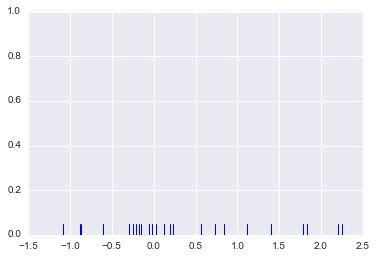

In [8]:
sns.rugplot(dataset)
plt.ylim(0,1)

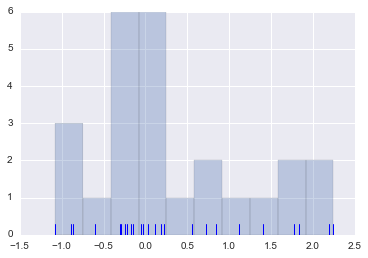

In [9]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

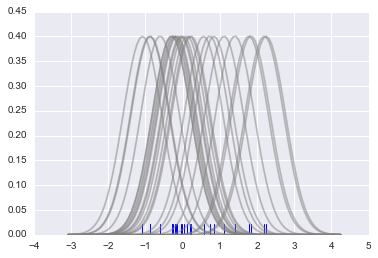

In [10]:
sns.rugplot(dataset)
x_min=dataset.min()-2
x_max=dataset.max()+2
x_axis=np.linspace(x_min,x_max,100)
bandwidth=((4*dataset.std()**5)/(3*len(dataset)))**0.2
kernel_list=[]
for data_point in dataset:
    kernel=stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    kernel=kernel/kernel.max()
    kernel=kernel*0.4
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    

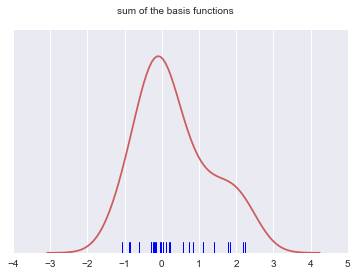

In [11]:
sum_of_kde=np.sum(kernel_list,axis=0)
fig=plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("sum of the basis functions")

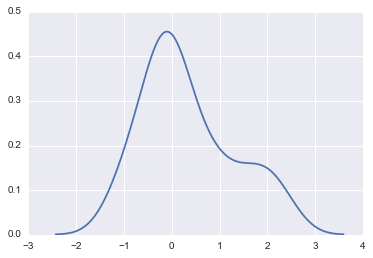

In [12]:
sns.kdeplot(dataset)

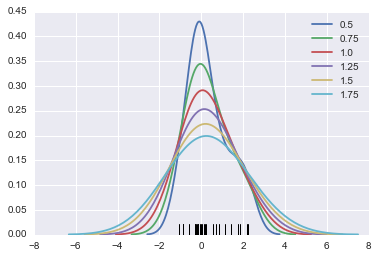

In [14]:
sns.rugplot(dataset,color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

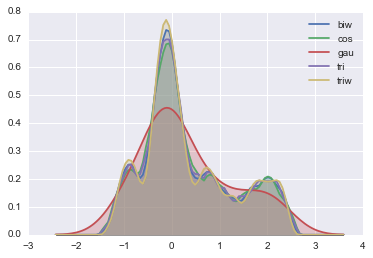

In [16]:
kernel_options=['biw','cos','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

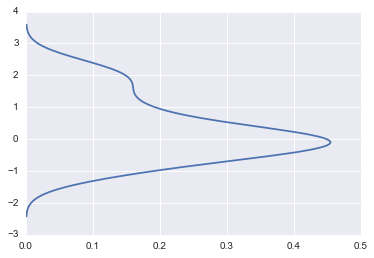

In [17]:
sns.kdeplot(dataset,vertical=True)

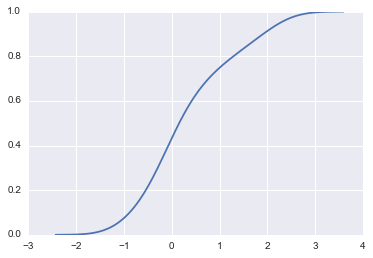

In [18]:
sns.kdeplot(dataset,cumulative=True)

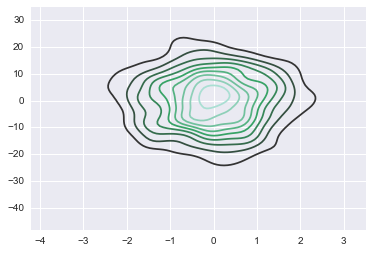

In [19]:
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2=np.random.multivariate_normal(mean,cov,1000)
dframe=DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

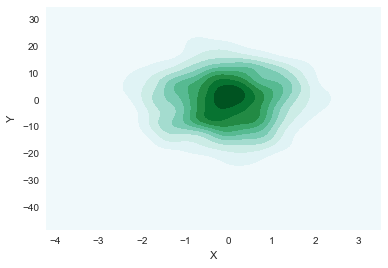

In [21]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

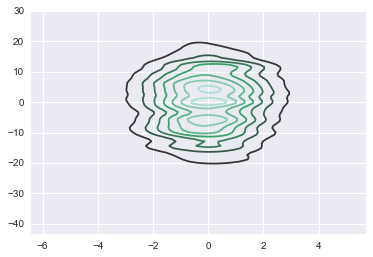

In [22]:
sns.kdeplot(dframe,bw=1)

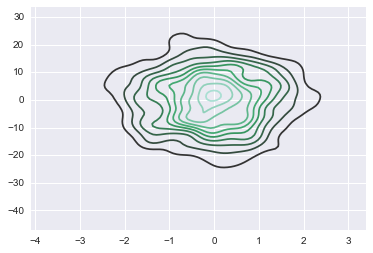

In [23]:
sns.kdeplot(dframe,bw='silverman')

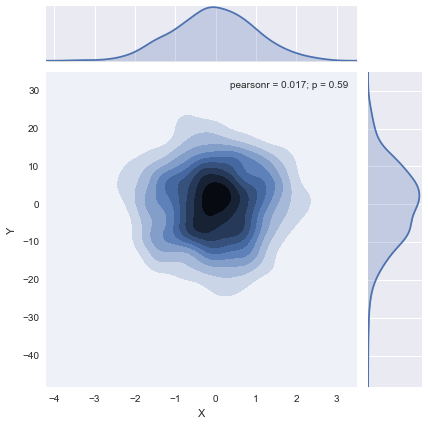

In [24]:
sns.jointplot('X','Y',dframe,kind='kde')